### K-means

K-means produces fun pictures in this case, but I don't yet see any use for it.

Desity-based clustering (DBSCAN) gives better insight, see the folder DBSCAN.

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [4]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [7]:
points=acc[['longitude','latitude']]

In [12]:
X = np.array(acc[['longitude','latitude']])

In [13]:
sel_size=200
x=X[:sel_size]

In [14]:
km = KMeans(50)
labels = km.fit_predict(X)

In [15]:
l=labels[:sel_size]

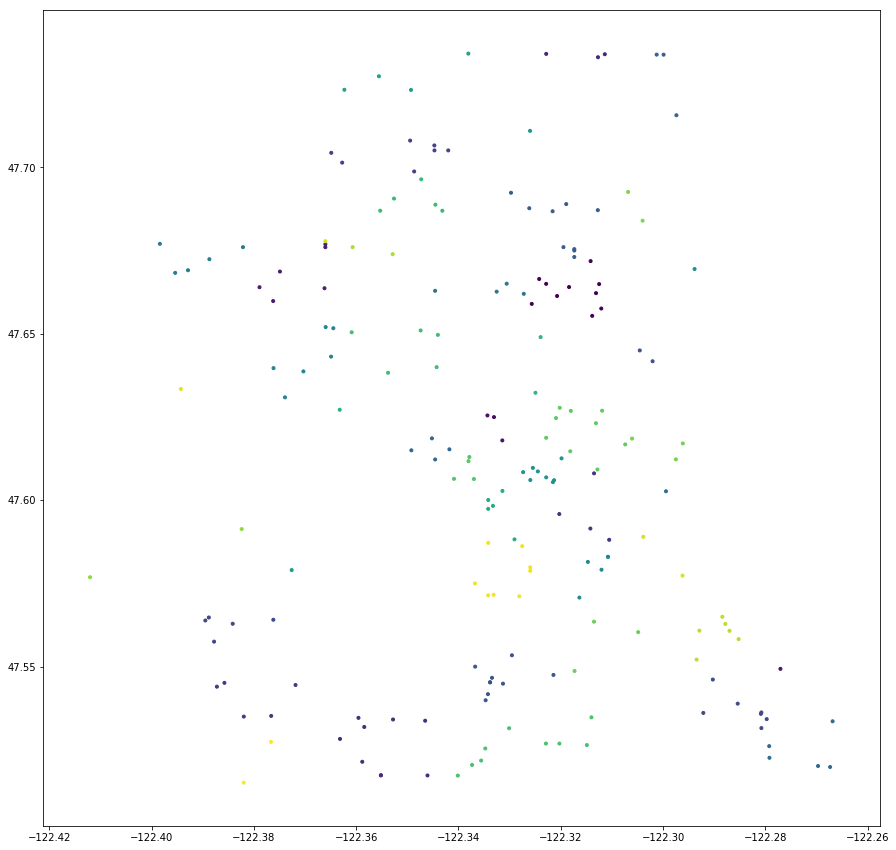

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

In [17]:
c = km.cluster_centers_

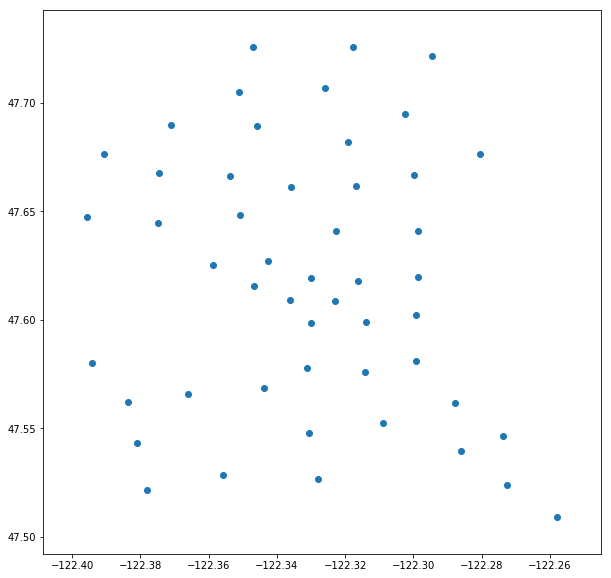

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(c[:,0],c[:,1])

In [19]:
x=X[:2000]
maxk = 10
wcss = np.zeros(maxk)

for k in range(1, maxk):
    km = KMeans(k)
    y = km.fit_predict(x)
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
#             print('i1:',i1, ' i2:', i2)
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2

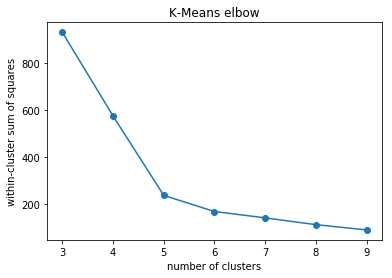

In [29]:
fig, ax = plt.subplots()
ax.plot(range(3,maxk), wcss[3:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")
plt.title('K-Means elbow')
plt.savefig('../images_part2/K_Means_elbow.png')

### K-means is not going to give good clusters in this case. 
We need density-based clustering. --> other notebook

Let's see in ay case what it looks like with 5 clusters

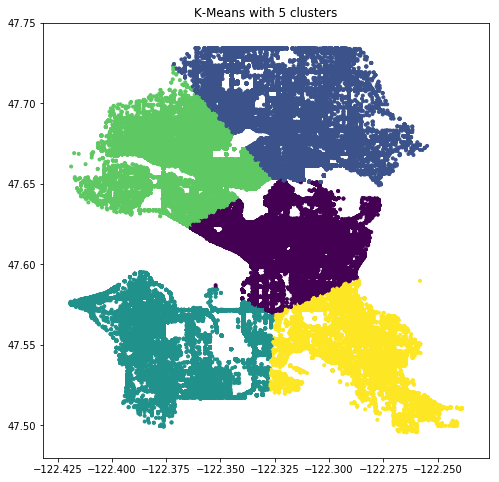

In [27]:
sel_size=200000
x=X[:sel_size]
km = KMeans(5)
labels = km.fit_predict(X)
l=labels[:sel_size]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')
plt.title('K-Means with 5 clusters')
plt.savefig('../images_part2/K_Means_5_cl.png')

Text(0.5, 1.0, 'K-Means with 10 clusters')

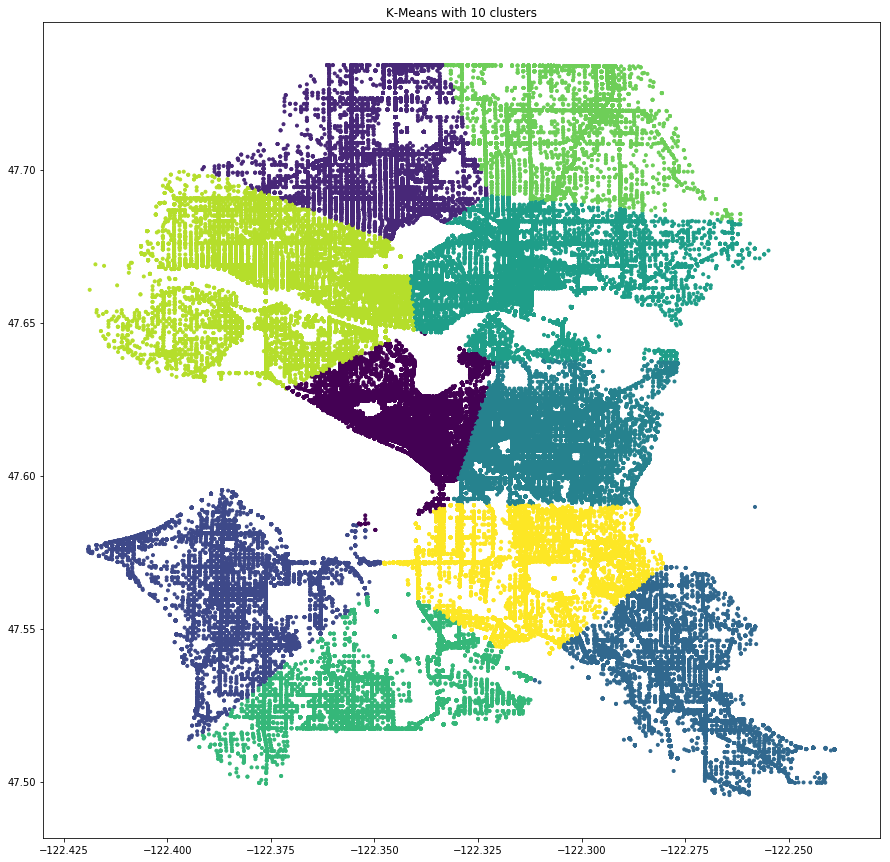

In [22]:
sel_size=200000
x=X[:sel_size]
km = KMeans(10)
labels = km.fit_predict(X)
l=labels[:sel_size]

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')
plt.title('K-Means with 10 clusters')

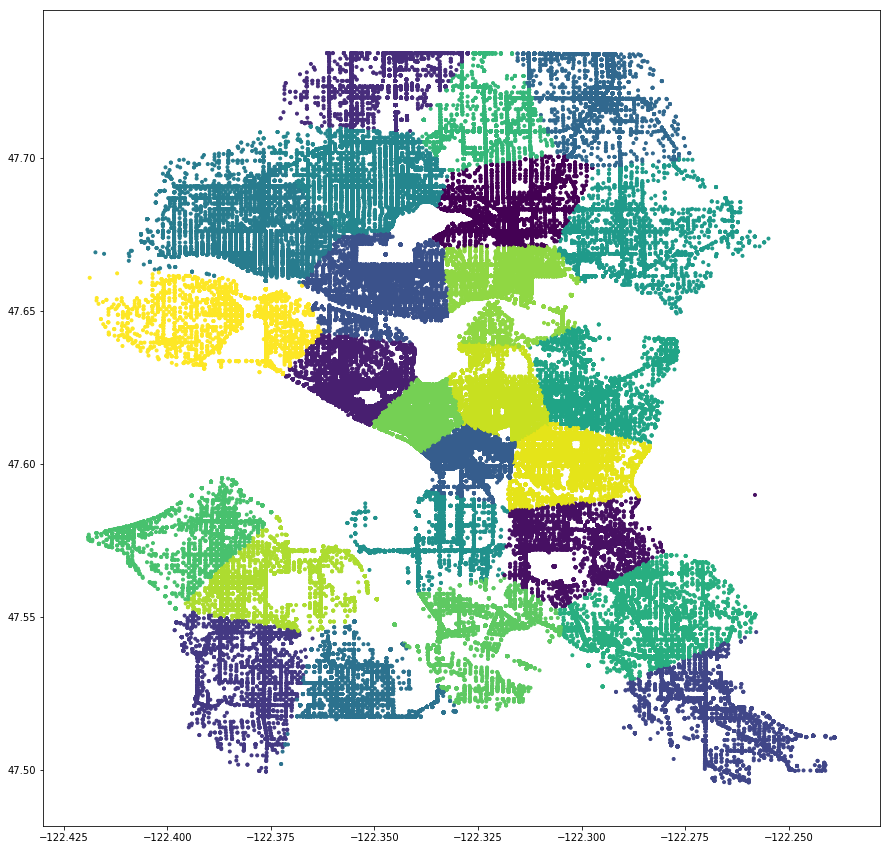

In [14]:
sel_size=200000
x=X[:sel_size]
km = KMeans(25)
labels = km.fit_predict(X)
l=labels[:sel_size]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')